# Initial Exploration: Correlation and Visualization

We have a data set of almost 180.000 campaigns. The data set has mostly (but not completely) been cleaned. Data for 100.000 projects  Download 100.000 projects(training set) is provided to you with information of whether the project was completely funded (succeeded) or not. For the remaining 78.065 projects  Download 78.065 projects(test set) the funding status is withheld. Your assignment is to train a model that will predict the funding status of the remaining projects. You will hand in these predictions, and then we can check how well your model did.

The grading of your project, however, does not depend on the quality of your model, it depends on how well you can explain what you did and why. 
You will show this in a presentation in the last week of the course. 

In [63]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

# pd.set_option('display.max_rows', None)


In [64]:
trainData = pd.read_csv (r'./KS_model_training_data.csv', sep = ',')
testData = pd.read_csv (r'./KS_test_data.csv', sep = ';')
np.where(testData.applymap(lambda x: x == ''))
trainData = trainData.drop(columns=['backers_count', 'converted_pledged_amount', 'pledged', 'usd_pledged'])

In [65]:
#Checking for null values
trainData.isnull().sum()

project_id     0
blurb          2
category       0
country        3
created_at     0
currency       0
deadline       0
fx_rate        0
goal           0
launched_at    0
name           1
staff_pick     0
location       0
funded         0
subcategory    0
project_url    0
reward_url     0
dtype: int64

In [66]:
#Dropping null values since we have a large data set and negligible null values 
trainData = trainData.dropna()
testData = testData.dropna()
np.where(trainData.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [67]:
#Transforming timestamps into the format we require
trainData['created_at'] = pd.to_datetime(trainData['created_at'],unit='s')
trainData['created_month'] = trainData.created_at.apply(lambda x: x.month)
trainData['deadline'] = pd.to_datetime(trainData['deadline'],unit='s')

#derived features
trainData['created_year'] = trainData.created_at.apply(lambda x: x.year)
trainData['blurb_length'] = trainData['blurb'].str.len()
trainData['name_length'] = trainData['name'].str.len()
trainData['Project_duration'] = (trainData['deadline'] - trainData['created_at']).dt.days

In [68]:
testData['name_length'] = testData['name'].str.len()
testData['blurb_length'] = testData['blurb'].str.len()

testData['created_at'] = pd.to_datetime(testData['created_at'],unit='s')
testData['created_month'] = testData.created_at.apply(lambda x: x.month)
testData['created_year'] = testData.created_at.apply(lambda x: x.year)

<AxesSubplot:xlabel='funded', ylabel='count'>

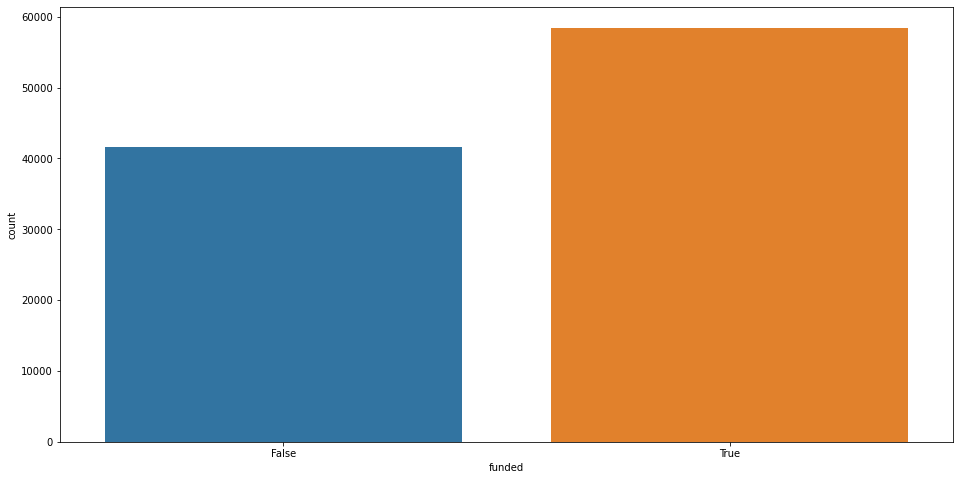

In [69]:
#Generally concluded projects are more susceptable to be approved by the given graph
sns.countplot(trainData['funded'])

<AxesSubplot:>

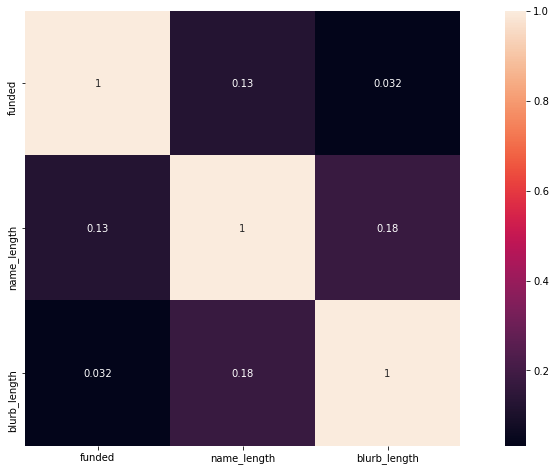

In [70]:
corr = trainData[['blurb_length', 'name_length', 'funded']].corr()
col = corr.nlargest(10, 'funded').index
sns.heatmap(corr.loc[col,col], annot=True, square=True)

Concluded heatmap/scatterplots will not be a useful tool when plotting other features with funded. Reason being funded is a binary

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Number of Projects'),
 Text(0.5, 1.0, 'Year the project was created')]

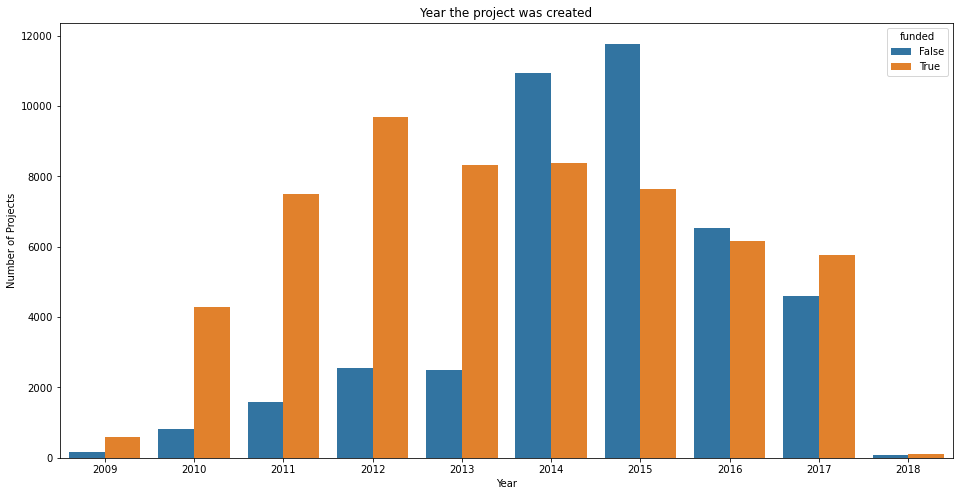

In [71]:
plot = sns.countplot(x=trainData.created_year, hue = trainData.funded)
plot.set(xlabel='Year', ylabel='Number of Projects', title= 'Year the project was created')

Given the graph, we notice that up until the year 2013, there was a greater chance of any project being approved whereas from 2014 onwards, it can be seen that, although a higher jump in the total number of projects, number of projects denied is signicantly higher for the next years. Our theory is it has to do with a sudden jump in the application of projects.

<AxesSubplot:title={'center':'Project_duration'}, xlabel='funded'>

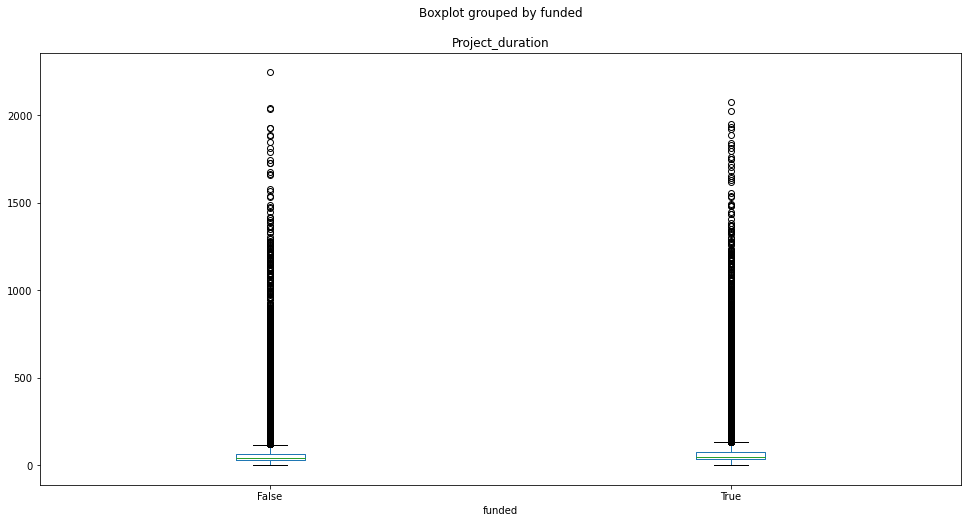

In [72]:
trainData.boxplot(by ='funded', column =['Project_duration'], grid = False)

Given the graph, we can see that there is not really any recognisable pattern to tell us if there is any probability

https://pbpython.com/categorical-encoding.html
We tried to use labelencoding to give categorical values a code with wich we can then see if there is any correlation between categories and funding.

[Text(0.5, 0, 'Category'),
 Text(0, 0.5, 'Number of Projects'),
 Text(0.5, 1.0, 'Category')]

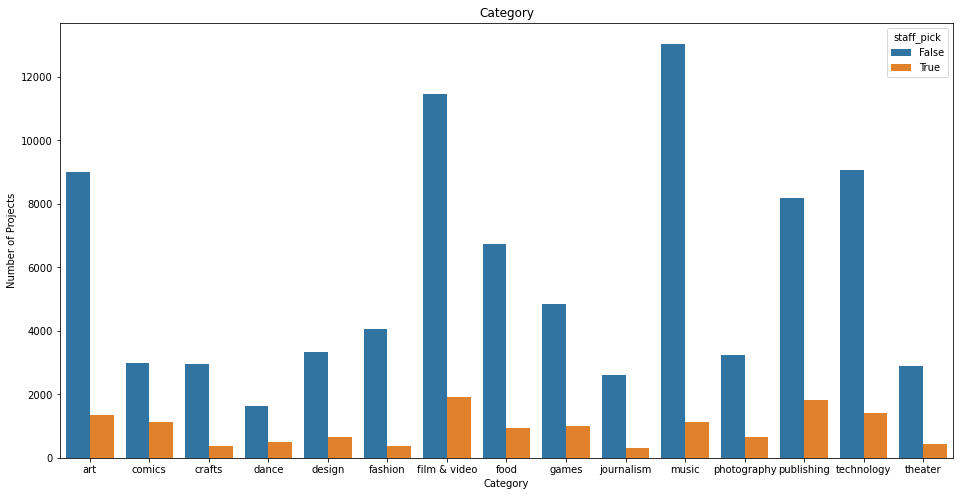

In [73]:
plot = sns.countplot(x=trainData.category, hue = trainData.staff_pick)
plot.set(xlabel='Category', ylabel='Number of Projects', title= 'Category')

It can be seen that majoirty of the dataset did not pick the staff.

In [74]:
isPicked = trainData.loc[trainData['staff_pick']==1]
isNotPicked = trainData.loc[trainData['staff_pick']==0]

[Text(0.5, 0, 'Category'),
 Text(0, 0.5, 'Number of Projects'),
 Text(0.5, 1.0, 'Category')]

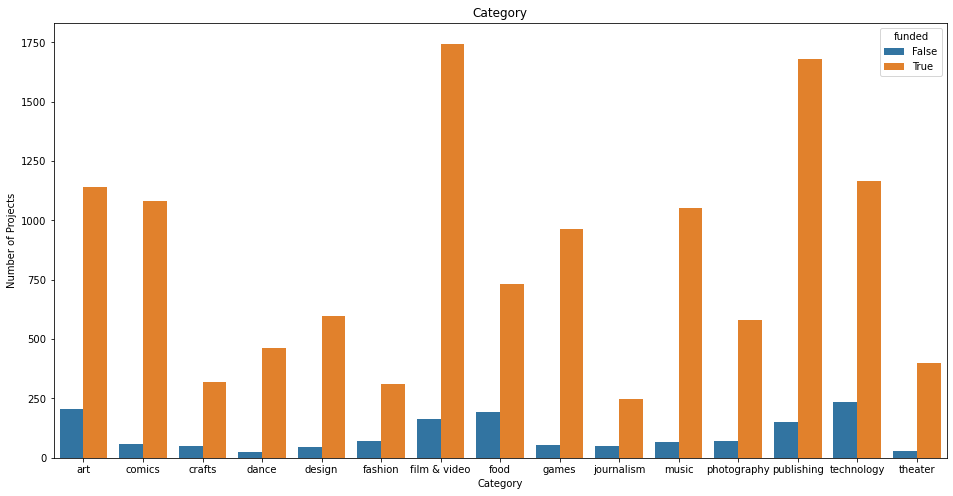

In [75]:
plot = sns.countplot(x=isPicked.category, hue = isPicked.funded)
plot.set(xlabel='Category', ylabel='Number of Projects', title= 'Category')

Suprisingly to our knowledge, after filtering the projects that did pick staff, we found out they were mostly approved  for funding as is evident.

[Text(0.5, 0, 'Category'),
 Text(0, 0.5, 'Number of Projects'),
 Text(0.5, 1.0, 'Category')]

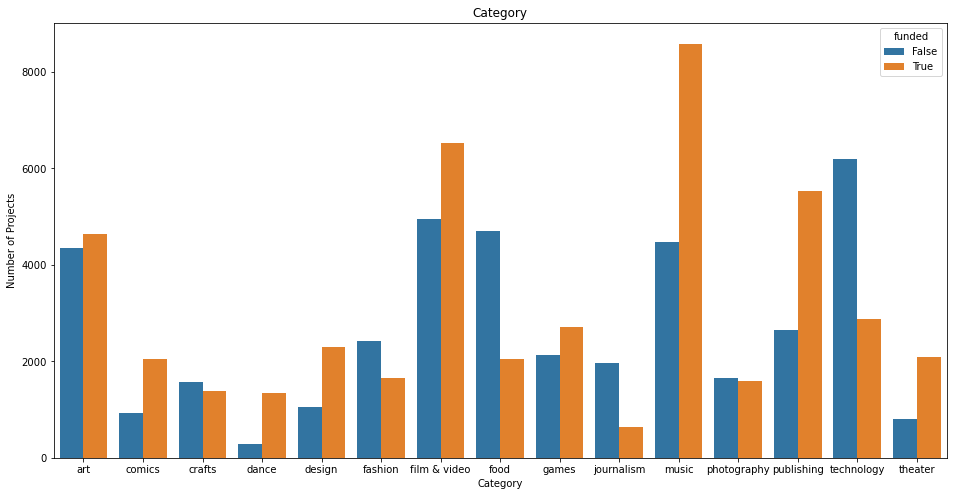

In [76]:
plot = sns.countplot(x=isNotPicked.category, hue = isNotPicked.funded)
plot.set(xlabel='Category', ylabel='Number of Projects', title= 'Category')

For the projects that did not pick the staff, the results do not follow a consistent pattern, rather there is mostly a 50/50 chance of being funded provided you had did not pick the staff. Since majority of the data actually has not picked the staff, using this in our model brought our accuracy since this is not a predective measure.

[Text(0.5, 0, 'Category'),
 Text(0, 0.5, 'Number of Projects'),
 Text(0.5, 1.0, 'Category')]

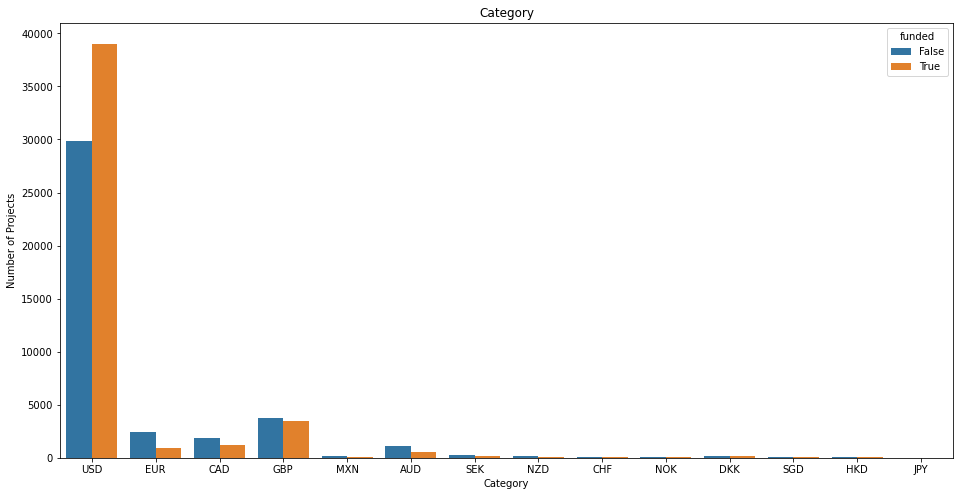

In [77]:
plot = sns.countplot(x=isNotPicked.currency, hue = isNotPicked.funded)
plot.set(xlabel='Category', ylabel='Number of Projects', title= 'Category')

Just to get the idea in which currency the most projects were submitted, mostly are US.

In [78]:
trainData.drop(['project_id', 'Project_duration', 'blurb', 'blurb_length','created_at', 'deadline', 'fx_rate', 'launched_at', 'name', 
                'location', 'project_url', 'reward_url', 'created_month', 'name_length','currency', 'country', 'goal', 'staff_pick'], 1, inplace=True)
test_project_id = testData['project_id']
testData.drop(['project_id', 'blurb','blurb_length','created_at', 'deadline', 'fx_rate', 'launched_at', 'name', 'staff_pick', 
                'location', 'project_url', 'reward_url', 'created_month', 'name_length', 'currency', 'country', 'goal'], 1, inplace=True)

categoriesToEncode = ['category', 'subcategory']
trainHC = pd.get_dummies(trainData, prefix='category', columns=categoriesToEncode)
testHC = pd.get_dummies(testData, prefix='category', columns=categoriesToEncode)


In [79]:
trainHC.head(10)

,funded,created_year,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,...,category_wearables,category_weaving,category_web,category_webcomics,category_webseries,category_woodworking,category_workshops,category_world music,category_young adult,category_zines
0,True,2012,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,True,2012,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,True,2012,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,True,2012,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,True,2012,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,True,2012,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,True,2012,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,True,2012,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,True,2012,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,True,2012,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dropping the following coulmns with the reasons stated:
    1. "project_id" : Dropped since it serves its purpose as an idenity for each given project within the data frame.
    2. "blurb" : Purely subjective. We are dealing with numericals but the feature blurb serves as a motivation for
    the project's funding. We tried to implement a machine learning model based on certain key phrases but that was 
    not successful by any margin. We therefore concluded we cannot use this feature in our calculations for 
    prediction since our method of mesauring a successful blurb did not yield sufficient results to use.
    3. blurb_length, name_length: Deemed as irrelevant.
    4. created_at, deadline, launched at, create_month,  were all discarded as they were only for the visualisation 
    part for us to make sense of the data. 
    5. Project URL, reward URL deemed as invalid.
    6. Currency, fx_rate were deemed as invalid as they did not show any recognisable pattern in terms of influencing 
    the funded projects
    7. Goal deemed as invalid since the data spread did not reveal any recognisable pattern in terms of influencing
    the funded projects

In [80]:
y = trainHC['funded']
X = trainHC.drop('funded', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors = 27, leaf_size=20, p = 2)
model = knn.fit(X_train,y_train)
accuracy = knn.score(X_test, y_test)


# print(classification_report(y_test, knn.predict(X)))
print("test accuracy = " + str(round(100 * accuracy)) + "%")

test accuracy = 75%


In [20]:
from sklearn.model_selection import cross_val_score
knn.predict(X_test)
score = cross_val_score(knn, X_train, y_train, cv=10)
print("test accuracy = " + str(round(100 * np.mean(score))) + "%")

test accuracy = 73%


In [82]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = logreg.score(X_test, y_test)
print("test accuracy = " + str(round(100 * accuracy)) + "%")

test accuracy = 73%


In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_train, y_train, cv=10)
print("test accuracy = " + str(round(100 * np.mean(scores))) + "%")

In [ ]:
X = testHC
testHC['prediction'] = knn.predict(X)
testHC['project_id'] = test_project_id
testHC.to_csv('predictions.tsv', columns=['project_id','prediction'])


Gridsearch algorithm to determine the best hyperparameters for KNN

In [438]:
from sklearn.model_selection import GridSearchCV


#source
#https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

KeyboardInterrupt: 